In [3]:
import pandas as pd
data=pd.read_csv('colleges.csv')
data

,Degree_class,University,Letter,Experienced,Hired
0,First,U0N,Good,Yes,Y
1,First,U0N,Good,Yes,Y
2,First,U0N,Good,Yes,Y
3,First,U0N,Good,Yes,Y
4,Second,U0N,Good,Yes,N
5,Second,MOI,Bad,Yes,Y
6,Second,JKUAT,Good,Yes,N
7,Second,JKUAT,Good,Yes,N
8,Second,JKUAT,Good,No,Y
9,First,UON,Good,No,Y


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoded=data.apply(encoder.fit_transform)
college=encoded.values
college

array([[0, 2, 1, 1, 1],
       [0, 2, 1, 1, 1],
       [0, 2, 1, 1, 1],
       [0, 2, 1, 1, 1],
       [1, 2, 1, 1, 0],
       [1, 1, 0, 1, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 3, 1, 0, 1],
       [1, 3, 0, 0, 0]])

In [8]:
from sklearn.model_selection import train_test_split
training, testing=train_test_split(college, test_size=0.3, random_state=42)
print('Training data is:\n',training)
print('Testing data is:\n',testing)

Training data is:
 [[0 2 1 1 1]
 [0 2 1 1 1]
 [1 0 1 0 1]
 [1 2 1 1 0]
 [1 0 1 1 0]
 [0 2 1 1 1]
 [1 0 1 1 0]]
Testing data is:
 [[1 1 0 1 1]
 [0 2 1 1 1]
 [0 3 1 0 1]
 [1 3 0 0 0]]


In [11]:
X=training[:,0:4]
y=training[:,-1]
print('Independent variable is:\n',X)
print('Dependent variable is:\n',y)

Independent variable is:
 [[0 2 1 1]
 [0 2 1 1]
 [1 0 1 0]
 [1 2 1 1]
 [1 0 1 1]
 [0 2 1 1]
 [1 0 1 1]]
Dependent variable is:
 [1 1 1 0 0 1 0]


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(X)
scaled

array([[0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [1., 0., 0., 1.]])

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


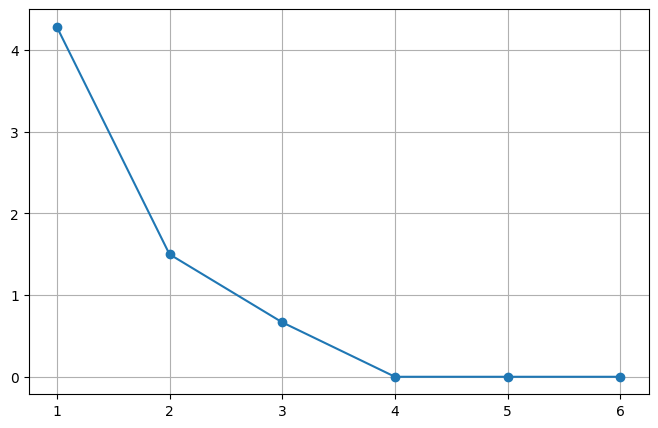

In [15]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
X=scaled
values=[]
for k in range(1,7):
    kmeans=KMeans(n_clusters=k, random_state=20)
    kmeans.fit(X)
    values.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1,7), values, marker='o')
plt.grid()

In [18]:
#apply KMeans
kmeans=KMeans(n_clusters=4, random_state=20)
kmeans.fit(scaled)
labels=kmeans.labels_
centroid=kmeans.cluster_centers_
print(labels)
print(centroid)

[1 1 3 2 0 1 0]
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 1. 0. 1.]
 [1. 0. 0. 0.]]
